Data201 Group Project Code

Comparision of 40 Countries (grouped by their HDI index) to social and economic factors

Data sourced from http://hdr.undp.org/en/data

In [104]:
# Install tidyverse, rvest and reshape
library(tidyverse)
install.packages("rvest")
library(rvest)
library(reshape2)

Warning message:
"package 'rvest' is in use and will not be installed"

Read in the information from the CSV file Income_Index.csv

CSV file from the undp website, Source: http://hdr.undp.org/en/indicators/103606

In [2]:
# Read in information from CSV files
income_index <- read_csv("Income_Index.csv") 
glimpse(income_index)

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character()
)
See spec(...) for full column specifications.


Observations: 195
Variables: 30
$ HDI     <dbl> 168, 68, 85, 35, 147, 70, 47, 83, 3, 20, 80, 54, 43, 136, 5...
$ Country <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "...
$ `1990`  <dbl> NA, 0.575, 0.694, 0.904, 0.456, 0.755, 0.701, 0.538, 0.850,...
$ `1991`  <dbl> NA, 0.523, 0.686, 0.902, 0.453, 0.762, 0.719, 0.529, 0.847,...
$ `1992`  <dbl> NA, 0.510, 0.686, 0.897, 0.450, 0.762, 0.736, 0.416, 0.846,...
$ `1993`  <dbl> NA, 0.531, 0.681, 0.891, 0.403, 0.769, 0.743, 0.427, 0.852,...
$ `1994`  <dbl> NA, 0.547, 0.676, 0.890, 0.363, 0.775, 0.750, 0.452, 0.857,...
$ `1995`  <dbl> NA, 0.570, 0.677, 0.891, 0.443, 0.764, 0.743, 0.465, 0.859,...
$ `1996`  <dbl> NA, 0.585, 0.680, 0.897, 0.468, 0.770, 0.749, 0.480, 0.863,...
$ `1997`  <dbl> NA, 0.568, 0.680, 0.910, 0.485, 0.776, 0.759, 0.491, 0.867,...
$ `1998`  <dbl> NA, 0.582, 0.687, 0.915, 0.483, 0.779, 0.762, 0.499, 0.873,...
$ `1999`  <dbl> NA, 0.602, 0.688, 0.921, 0.473, 0.781, 0.755, 0.505, 0.879,...
$ `2000`  <dbl> NA, 

Each column was automatically parsed in as a 'character' type. As there are many columns, it's easier to transform it to a long dataset first, so there are less columns to change to numeric values, and this is easier than specifing what type the columns should be parsed in as.

To filter out 4 groups of countries to compare (from most developed to less developed) we chose 10 that were the most developed, 10 the least developed and 10 from the 66% percentile and 10 from 33% percentile, using HDI index.

In [136]:
# Create vectors for the HDI indexes used in each group
highest <- c(1:10) # Most developed countries (1-10)
high <- c(54:63) # 66 Percentile (53-63)
low <- c(117:126) # 33 Percentile (116-126)
lowest <-c(180:189) # Least developted countries (179-189)

# Create function to convert to long format (easier for graphing)
convert_to_long <- function(data) {
    gather(data, Year, Factor, -HDI, -Country) %>%
    # Transform variables to numeric type for graphing
    transform(Year = as.numeric(Year), Factor = as.numeric(Factor), check.names=FALSE) %>%
    na.omit() # Omit NA's
}

Sort the income_index dataset by HDI rank, convert to long dataframe

In [118]:
income_index <- income_index %>%
    arrange(HDI) %>% # Sort dataframe by HDI rank
    na.omit() #Omit missing values

# Create dataframe for each set of HDI indexes
income_index_highest <- subset(income_index, HDI %in% highest)
income_index_highest$HDI <- '1'

income_index_high <- subset(income_index, HDI %in% high)
income_index_high$HDI <- '2'

income_index_low <- subset(income_index, HDI %in% low)
income_index_low$HDI <- '3'

income_index_lowest <- subset(income_index, HDI %in% lowest)
income_index_lowest$HDI <- '4'

# Bind data into new dataframe
income_index2 <- rbind(income_index_highest, income_index_high, income_index_low, income_index_lowest) 

# Conver to long dataframe
income_index2 <- convert_to_long(income_index2)

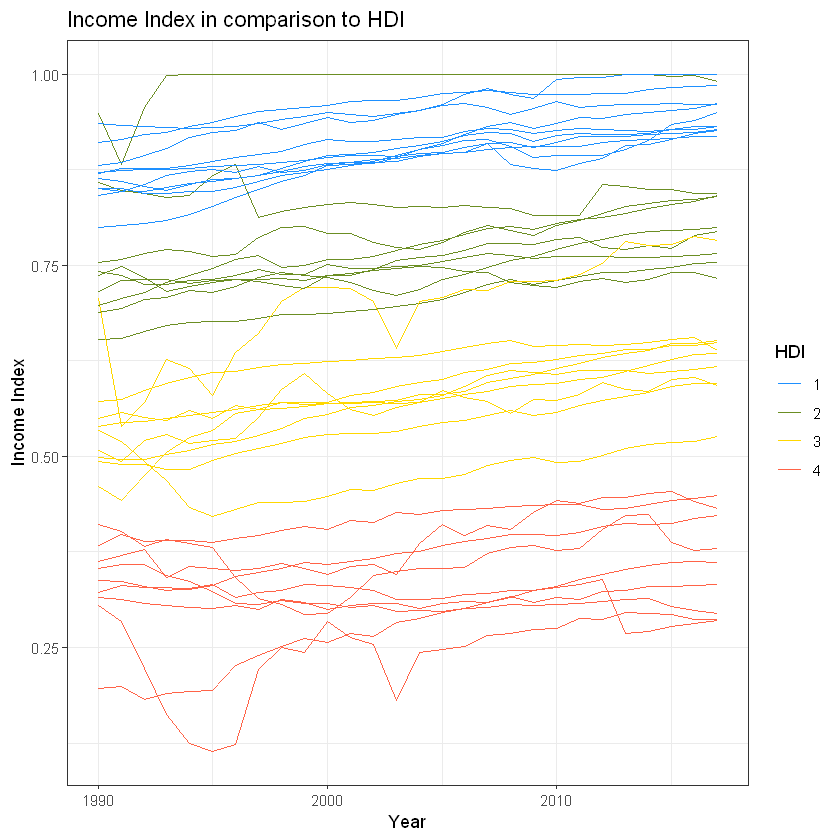

In [119]:
ggplot() +
    # Plot the income index in comparison to HDI
    geom_line(data = income_index2, aes(x=Year, y=Factor, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pic colors and theme
    ggtitle('Income Index in comparison to HDI') + xlab('Year') + ylab('Income Index') # Labels

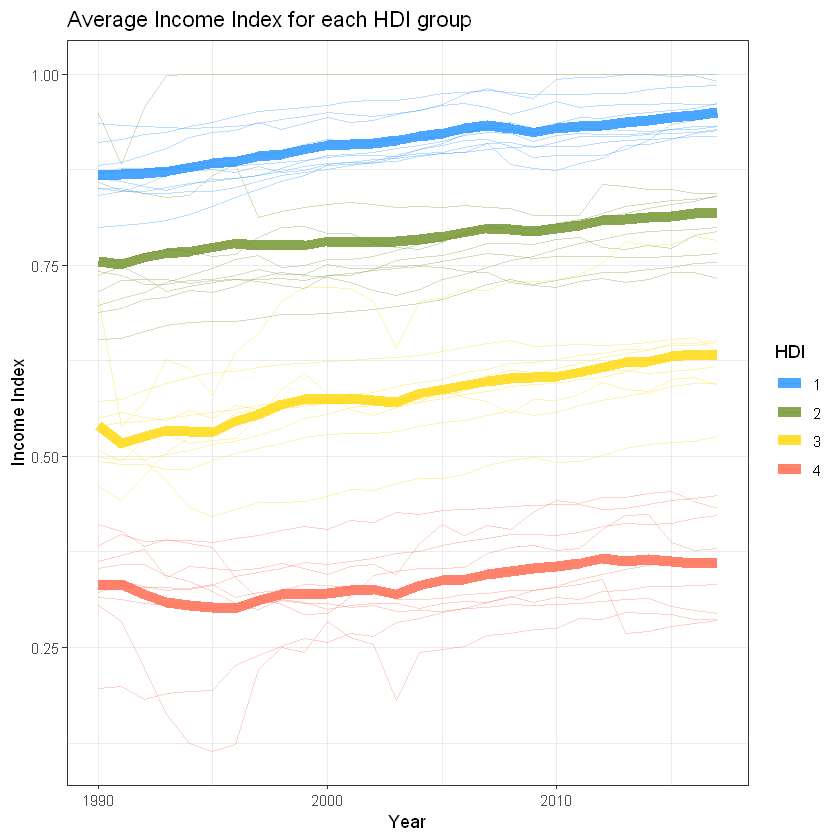

In [120]:
# Group the long dataframe by HDI and Year so we can find the average Income Index for each group
income_index_grouped <- income_index2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Factor = mean(Factor)) # Find average of Income Index

# Plot the Average Income Index for each HDI group
ggplot(income_index2, aes(x = Year, y = Factor, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot lines for each country
    geom_line(data = income_index_grouped, alpha = .8, size = 3) + # Plot bold line for average
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually pick colors
    theme_bw() + ggtitle('Average Income Index for each HDI group') + 
    xlab('Year') + ylab('Income Index') # Labels

Read in the information from the CSV file Income_Index.csv

CSV file from the undp website, Source: http://hdr.undp.org/en/indicators/140606

In [121]:
# Read in data from CSV file
unemployment <- read_csv("Unemployment_Total.csv")
glimpse(unemployment)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1991` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


Observations: 195
Variables: 14
$ HDI     <dbl> 168, 68, 85, 147, 47, 83, 3, 20, 80, 54, 43, 136, 58, 53, 1...
$ Country <chr> "Afghanistan", "Albania", "Algeria", "Angola", "Argentina",...
$ `1991`  <dbl> 12.0, 22.3, 20.6, 23.7, 5.6, 2.0, 9.6, 3.4, 8.9, 12.2, 6.4,...
$ `1995`  <dbl> 8.7, 23.9, 27.9, 23.9, 18.8, 6.7, 8.5, 4.4, 8.0, 10.8, 5.9,...
$ `2000`  <dbl> 11.2, 22.7, 29.8, 23.7, 15.0, 10.9, 6.3, 4.7, 11.8, 7.2, 5....
$ `2005`  <dbl> 8.5, 17.5, 15.3, 21.4, 11.5, 8.2, 5.0, 5.6, 7.3, 10.2, 7.8,...
$ `2010`  <dbl> 7.8, 14.2, 10.0, 9.9, 7.4, 19.0, 5.2, 4.8, 5.6, 14.3, 1.1, ...
$ `2011`  <dbl> 8.2, 14.0, 10.0, 7.4, 7.1, 18.4, 5.1, 4.6, 5.4, 14.5, 1.2, ...
$ `2012`  <dbl> 7.9, 13.4, 11.0, 7.4, 7.3, 17.3, 5.2, 4.9, 5.2, 14.0, 1.2, ...
$ `2013`  <dbl> 8.5, 15.6, 9.8, 7.3, 6.6, 16.2, 5.7, 5.3, 5.0, 16.2, 1.2, 4...
$ `2014`  <dbl> 8.7, 17.5, 10.6, 7.3, 7.0, 17.5, 6.1, 5.6, 4.9, 13.8, 1.2, ...
$ `2015`  <dbl> 8.9, 17.1, 11.2, 7.3, 6.9, 18.3, 6.1, 5.7, 5.0, 12.0, 1.2, ...
$ `2016`  <dbl> 8.8,

In [122]:
# Sort by HDI, omit NA's
unemployment <- unemployment %>%
    arrange(HDI) %>% # Sort dataframe by HDI rank
    na.omit() 

# Create dataframe for eachs set of HDI indexes
unemployment_highest <- subset(unemployment, HDI %in% highest)
unemployment_highest$HDI <- '1'

unemployment_high <- subset(unemployment, HDI %in% high)
unemployment_high$HDI <- '2'

unemployment_low <- subset(unemployment, HDI %in% low)
unemployment_low$HDI <- '3'

unemployment_lowest <- subset(unemployment, HDI %in% lowest)
unemployment_lowest$HDI <- '4'

# Bind data into new dataframe
unemployment2 <- rbind(unemployment_highest, unemployment_high, unemployment_low, unemployment_lowest) 

# Conver to long dataframe
unemployment2 <- convert_to_long(unemployment2)

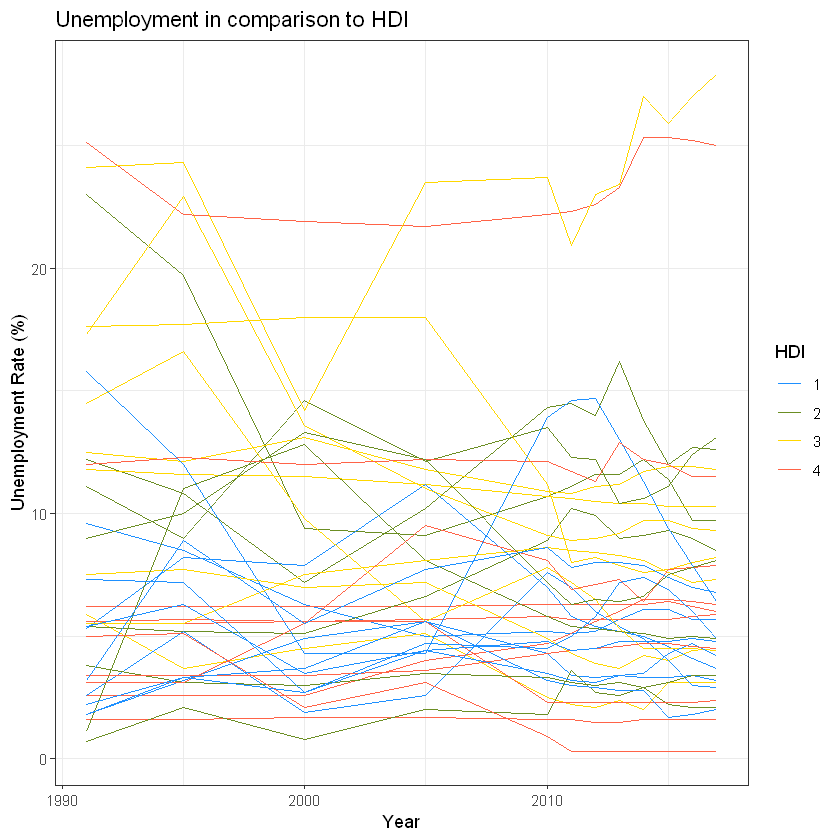

In [124]:
# Plot the unemployment in comparison to HDI
ggplot() +
    geom_line(data = unemployment2, aes(x=Year, y=Factor, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colors/theme
    ggtitle('Unemployment in comparison to HDI') + xlab('Year') + ylab('Unemployment Rate (%)') # Labels

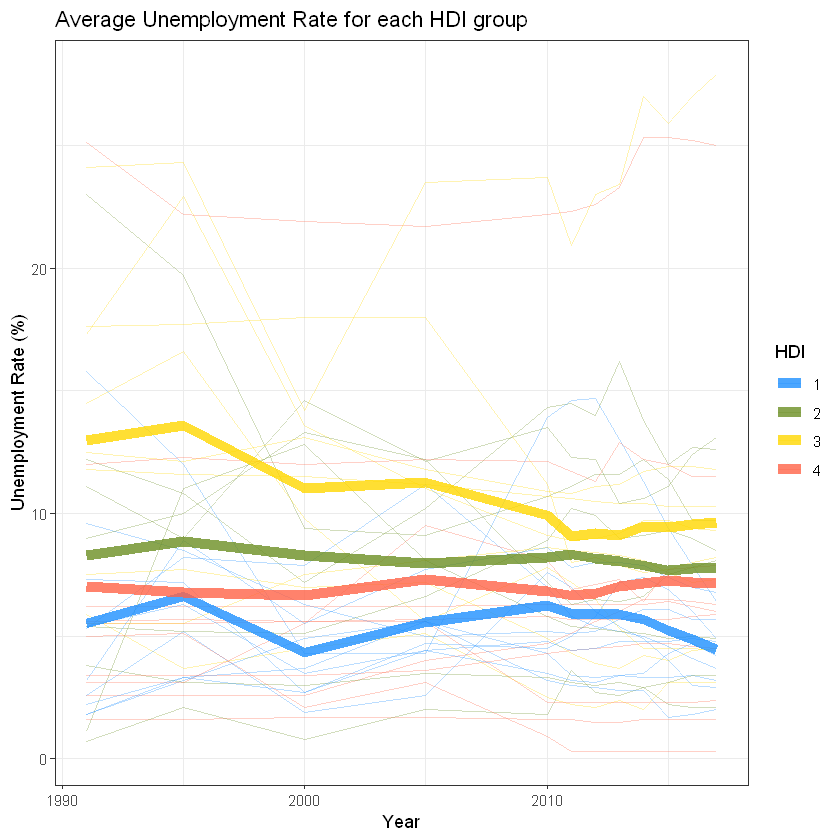

In [125]:
# Group the long dataframe by HDI and Year so we can find the average Unemployment rate for each group
unemploymentgrouped <- unemployment2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Factor = mean(Factor)) # Find average unemployment rate

# Plot the Average Income Index for each HDI group
ggplot(unemployment2, aes(x = Year, y = Factor, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot lines for each country
    geom_line(data = unemploymentgrouped, alpha = .8, size = 3) + # Plot bold line for average
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually pick colours
    theme_bw() + ggtitle('Average Unemployment Rate for each HDI group') + 
    xlab('Year') + ylab('Unemployment Rate (%)') # Labels

In [126]:
# Get the url of the page and read it into R
url_page <- "https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/weorept.aspx?sy=2017&ey=2024&scsm=1&ssd=1&sort=country&ds=.&br=1&pr1.x=55&pr1.y=7&c=668%2C548%2C193%2C678%2C313%2C316%2C686%2C218%2C688%2C138%2C748%2C618%2C624%2C692%2C142%2C626%2C628%2C565%2C238%2C253%2C643%2C718%2C724%2C576%2C733%2C134%2C336%2C146%2C532%2C176%2C429%2C433%2C178%2C916%2C298%2C443%2C917&s=LUR&grp=0&a="
read_url <- read_html(url_page)

In [127]:
# Observe the actual html structure of the webpage in R
read_url %>%
html_structure()

<html [xmlns, xml:lang, lang]>
  <head>
    <meta [http-equiv, content]>
    <script [type]>
      {cdata}
    <script [type]>
      {cdata}
    <title>
      {text}
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <link [rel, href, type]>
    <link [rel, href, type, media]>
    {comment}
    {comment}
    <script [type]>
      {cdata}
    {comment}
    {comment}
    {comment}
    {comment}
    {comment}
    {comment}
    <script [type, language, src]>
    {comment}
    <script [type]>
      {cdata}
    {comment}
    {comment}
    <script [type]>
      {cdata}
    {comment}
    <script [language, type, src]>
    {comment}
    {comment}
    <script [src]>
    {comment}
  <body.default [bgcolor]>
    {text}
    {c

In [128]:
# Get the tables from webpage into R and select the table number 5
tables <- read_url %>%
html_nodes("table")
unemployment_df <- as.data.frame(tables[5] %>% html_table(fill = TRUE))

In [129]:
# Delete the first two rows unused 
updated_unemployment_df <- unemployment_df[-c(1, 2),]

# Delete the unused column 
updated_unemployment_df$'X14' <- NULL
updated_unemployment_df$'X4' <- NULL
updated_unemployment_df$'X5' <- NULL

# Rename columns
updated_unemployment_df <- rename(updated_unemployment_df, "Country" = "X1", "Subject Descriptor" = "X2", "Units" = "X3", 
       "2017" = "X6", "2018" = "X7", "2019" = "X8", "2020" = "X9",
      "2021" = "X10", "2022" = "X11", "2023" = "X12", "2024" = "X13")

# Rename some values to join left with the other table to get the HDI
updated_unemployment_df["6", "Country"] <- "Bolivia (Plurinational State of)"
updated_unemployment_df["15", "Country"] <- "Hong Kong, China (SAR)"
updated_unemployment_df["4", "Country"] <- "Bahamas"
updated_unemployment_df["18", "Country"] <- "Iran (Islamic Republic of)"
updated_unemployment_df["23", "Country"] <- "Kyrgyzstan"

In [130]:
# Get the HDIs and corresponding countries from the unemployment df
get_HDI_countries <- unemployment %>% select(c(1,2))

# Separate countries into 4 tiers of HDI (highest, high, low, lowest)
group1 <- get_HDI_countries %>% subset(HDI %in% highest) 
group1$HDI <- '1'
group2 <- get_HDI_countries %>% subset(HDI %in% high)
group2$HDI <- '2'
group3 <- get_HDI_countries %>% subset(HDI %in% low)
group3$HDI <- '3'
group4 <- get_HDI_countries %>% subset(HDI %in% lowest)
group4$HDI <- '4'

In [131]:
HDI_countries <- rbind(group1, group2, group3, group4)

In [137]:
# Merge two dfs "HDI_countries" and "updated_uneployment_df" together using left join (all the values of the y df will be sorted by the x df)
unemp_df <- merge(x = HDI_countries, y = updated_unemployment_df, by = "Country", all.x = TRUE)

unemp_df <- unemp_df %>% 
            select(-c(3,4),) %>% 
            arrange(HDI) %>%
            na.omit()

unemp_df <- convert_to_long(unemp_df)

# Merge dataframe of unemployment values from the UNDP with predicted unemployment values from the WEO
unemployment3 <- rbind(unemployment2, unemp_df)

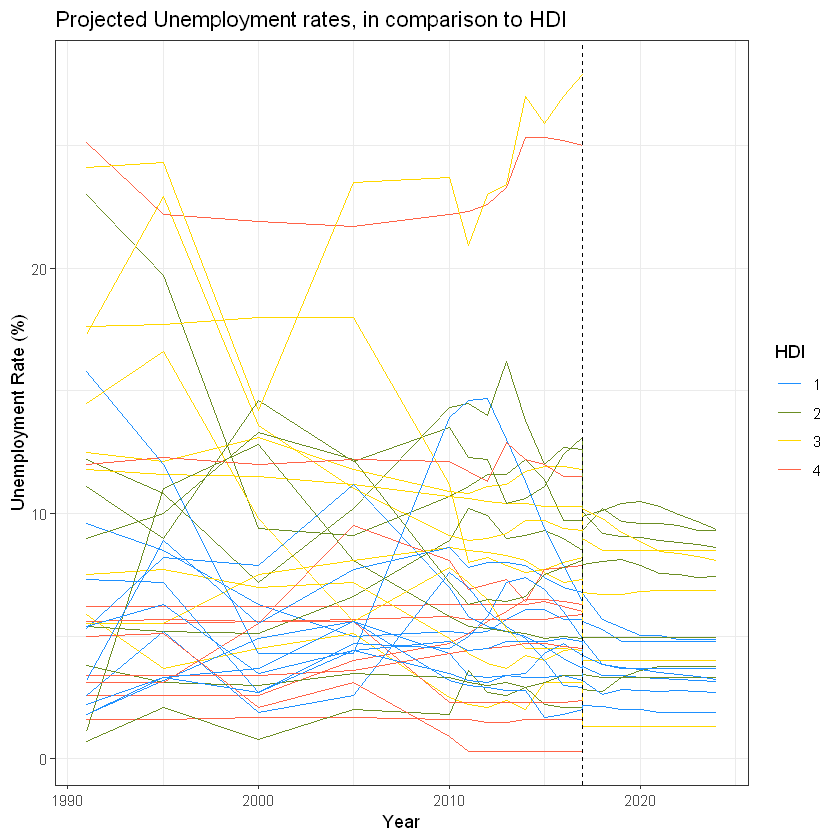

In [139]:
# Plot the unemployment in comparison to HDI
ggplot() +
    geom_line(data = unemployment3, aes(x=Year, y=Factor, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colors
    # Add labels
    ggtitle('Projected Unemployment rates, in comparison to HDI') + xlab('Year') + ylab('Unemployment Rate (%)') +
    geom_vline(xintercept = 2017, linetype='dashed') # Add line to indicate where WEO predictions begin

Source: http://hdr.undp.org/en/indicators/67106

In [140]:
# Read information from csv file using read_csv
income_inequality <- read_csv("Income_Inequality.csv")
glimpse(income_inequality)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `2010-2017` = col_double()
)


Observations: 154
Variables: 3
$ HDI         <dbl> 68, 85, 147, 47, 83, 3, 20, 80, 136, 53, 17, 163, 134, ...
$ Country     <chr> "Albania", "Algeria", "Angola", "Argentina", "Armenia",...
$ `2010-2017` <dbl> 29.0, 27.6, 42.7, 42.4, 32.5, 34.7, 30.5, 16.6, 32.4, 2...


Using Country, Group as id variables


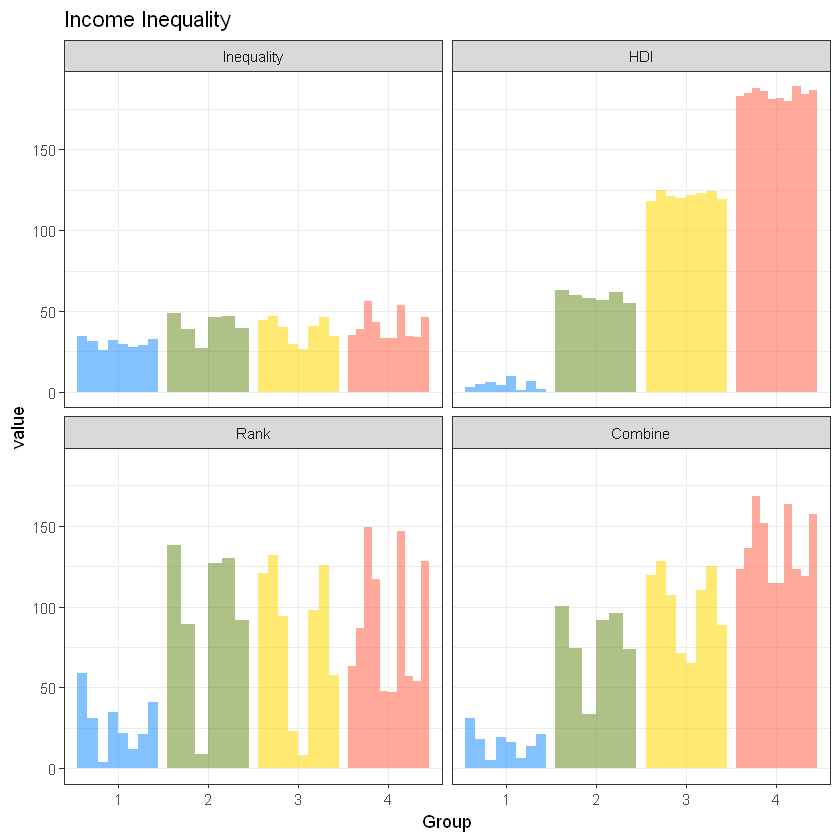

In [103]:
# Rename column 3
names(income_inequality)[3] <- 'Inequality'

# Sort by Inequality and omit empty columns
income_inequality <- income_inequality %>%
    arrange(Inequality) %>%
    na.omit() 

# Rank by income inequality, find average of income inequality and HDI 
income_inequality$Rank <- 1:nrow(income_inequality)
income_inequality$Combine <- ((income_inequality$HDI+income_inequality$Rank)/2)

# Find data for each HDI group and group by variables
income_inequality_highest <- subset(income_inequality, HDI %in% highest) %>% 
    group_by(Country, Inequality, HDI, Rank, Combine) %>% summarize(Group="1")

income_inequality_high <- subset(income_inequality, HDI %in% high) %>% 
    group_by(Country, Inequality, HDI, Rank, Combine) %>% summarize(Group="2")

income_inequality_low <- subset(income_inequality, HDI %in% low) %>% 
    group_by(Country, Inequality, HDI, Rank, Combine) %>% summarize(Group="3")

income_inequality_lowest <- subset(income_inequality, HDI %in% lowest) %>% 
    group_by(Country, Inequality, HDI, Rank, Combine) %>% summarize(Group="4")

# Bind dataframes together
income_inequality2 <- rbind(income_inequality_highest, income_inequality_high, income_inequality_low, income_inequality_lowest)

# Make four bar plots (using facet_wrap) 
ggplot() + 
    geom_bar(data = melt(income_inequality2), aes(x = Group, y = value, group=Country, fill=Group, alpha = 0.9), stat='identity',  position="dodge") +
    scale_fill_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colors
    ggtitle('Income Inequality') + theme(legend.position = ("none")) + # Labels
    facet_wrap(~ variable)

Source: http://hdr.undp.org/en/indicators/48806

In [141]:
# Read information from csv file using read_csv
male_employment <- read_csv("Male_Employment.csv")
glimpse(male_employment)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1990` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


Observations: 195
Variables: 14
$ HDI     <dbl> 168, 68, 85, 147, 47, 83, 3, 20, 80, 54, 43, 136, 58, 53, 1...
$ Country <chr> "Afghanistan", "Albania", "Algeria", "Angola", "Argentina",...
$ `1990`  <dbl> 86.7, 74.4, 76.5, 81.6, 75.5, 70.5, 75.8, 70.0, 70.2, 79.4,...
$ `1995`  <dbl> 86.4, 73.7, 77.7, 81.3, 75.0, 69.2, 74.0, 70.3, 71.9, 82.4,...
$ `2000`  <dbl> 86.5, 73.6, 74.7, 80.8, 75.4, 66.6, 72.3, 68.9, 70.3, 81.5,...
$ `2005`  <dbl> 87.1, 67.9, 71.8, 80.6, 75.6, 65.9, 72.2, 66.1, 66.0, 81.6,...
$ `2010`  <dbl> 86.6, 63.0, 70.1, 80.5, 74.0, 71.7, 72.5, 66.9, 66.8, 82.0,...
$ `2011`  <dbl> 86.5, 64.4, 69.5, 80.6, 74.5, 70.9, 72.3, 66.6, 67.3, 81.9,...
$ `2012`  <dbl> 86.5, 66.1, 68.9, 80.6, 74.1, 70.5, 71.8, 66.7, 67.6, 81.8,...
$ `2013`  <dbl> 86.6, 62.7, 70.2, 80.5, 73.9, 70.6, 71.4, 66.6, 68.0, 81.8,...
$ `2014`  <dbl> 86.6, 63.9, 67.4, 80.4, 73.5, 70.8, 71.0, 66.1, 68.4, 81.9,...
$ `2015`  <dbl> 86.7, 65.2, 67.4, 80.3, 73.4, 70.2, 71.2, 66.0, 68.7, 82.0,...
$ `2016`  <dbl> 86.7

In [147]:
# Filter out empty columns, sort by HDI rank 
male_employment <- male_employment %>%
    arrange(HDI) %>%
    na.omit()

# Create dataframe for eachs set of HDI indexes
male_employment_highest <- subset(male_employment, HDI %in% highest)
male_employment_highest$HDI <- '1'

male_employment_high <- subset(male_employment, HDI %in% high)
male_employment_high$HDI <- '2'

male_employment_low <- subset(male_employment, HDI %in% low)
male_employment_low$HDI <- '3'

male_employment_lowest <- subset(male_employment, HDI %in% lowest)
male_employment_lowest$HDI <- '4'

# Bind dataframes for each HDI group into one data frame
male_employment2 <- rbind(male_employment_highest, male_employment_high, male_employment_low, male_employment_lowest) 

# Convert to long dataframe
male_employment2 <- convert_to_long(male_employment2)

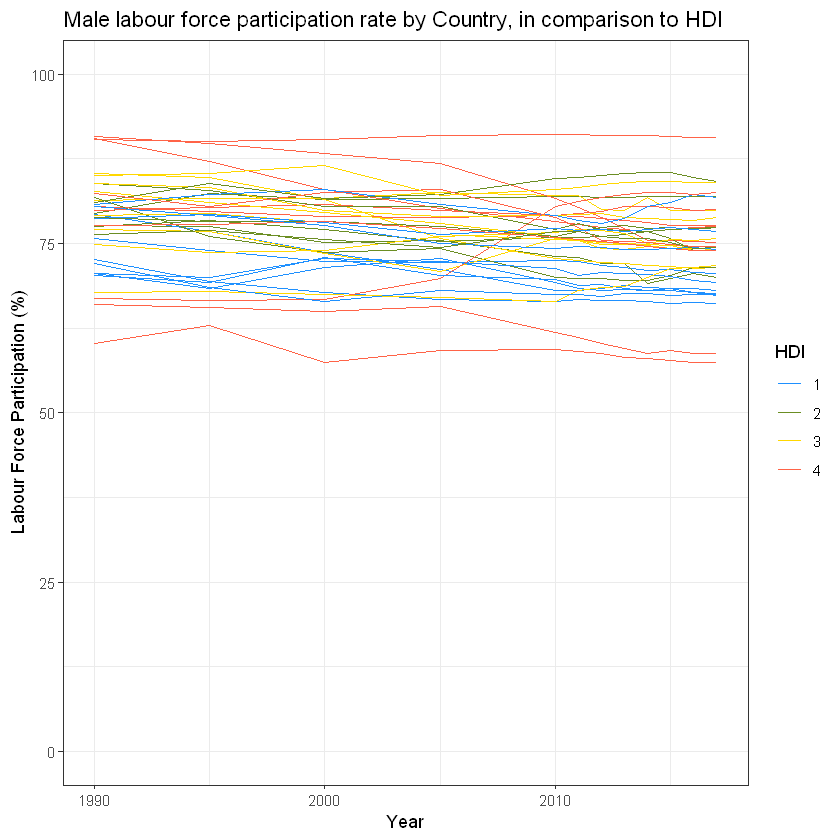

In [144]:
# Plot the male labour force participation rates in comparison to HDI
ggplot() +
    geom_line(data = male_employment2, aes(x=Year, y=Factor, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Pick colours manually
    ggtitle('Male labour force participation rate by Country, in comparison to HDI') + 
    xlab('Year') + ylab('Labour Force Participation (%)') + ylim(0,100) # Labels

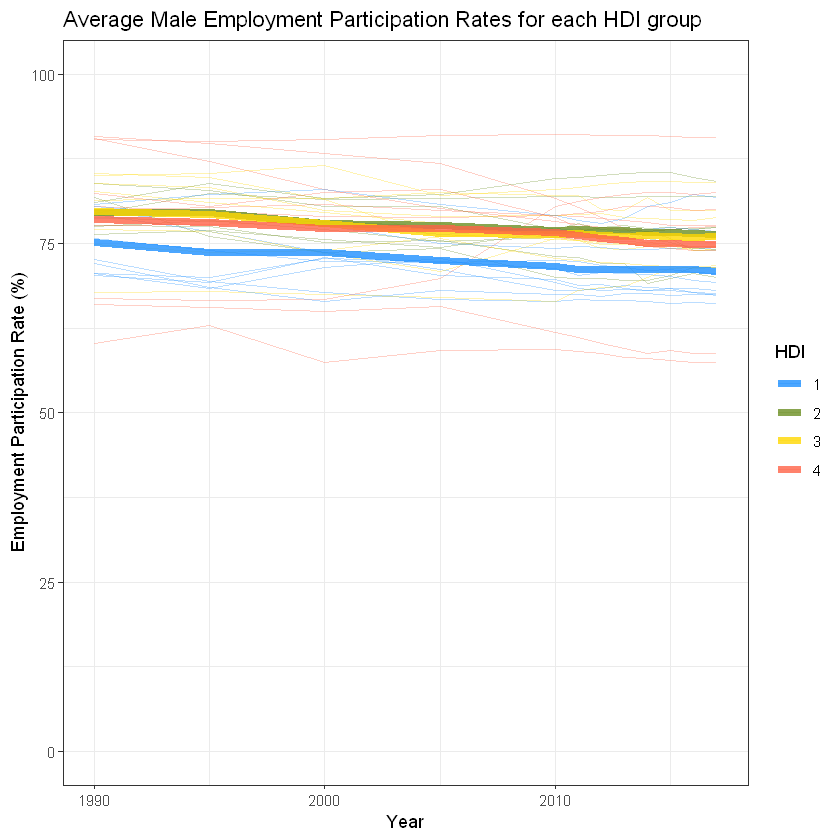

In [60]:
# Group the long dataframe by HDI and Year so we can find the average participation rate for each group
malegrouped <- male_employment2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Factor = mean(Factor)) # Find the average participation rate

ggplot(male_employment2, aes(x = Year, y = Factor, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot the lines for each country
    geom_line(data = malegrouped, alpha = .8, size = 2) + # Plot bold lines for averages
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually choose colours
    theme_bw() + ggtitle('Average Male Employment Participation Rates for each HDI group') + 
    xlab('Year') + ylab('Employment Participation Rate (%)') + ylim(0,100) # Labels

http://hdr.undp.org/en/indicators/48706

In [142]:
# Read information from csv file using read_csv
female_employment <- read_csv("Female_Employment.csv")
glimpse(female_employment)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1990` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


Observations: 195
Variables: 14
$ HDI     <dbl> 168, 68, 85, 147, 47, 83, 3, 20, 80, 54, 43, 136, 58, 53, 1...
$ Country <chr> "Afghanistan", "Albania", "Algeria", "Angola", "Argentina",...
$ `1990`  <dbl> 14.8, 53.6, 11.5, 75.2, 44.3, 49.0, 52.3, 43.4, 52.1, 64.8,...
$ `1995`  <dbl> 15.0, 53.5, 11.8, 74.7, 46.9, 48.8, 53.7, 48.8, 56.2, 68.3,...
$ `2000`  <dbl> 14.5, 51.7, 11.9, 74.7, 48.9, 48.0, 54.6, 48.9, 57.0, 69.2,...
$ `2005`  <dbl> 16.1, 48.1, 12.8, 74.9, 49.4, 47.5, 57.1, 50.7, 61.1, 69.9,...
$ `2010`  <dbl> 14.7, 45.7, 14.4, 75.3, 46.4, 49.6, 58.7, 53.5, 61.4, 70.1,...
$ `2011`  <dbl> 15.3, 47.1, 15.2, 75.3, 48.1, 52.1, 59.0, 53.8, 60.8, 70.0,...
$ `2012`  <dbl> 16.0, 48.8, 16.2, 75.4, 48.2, 52.0, 58.8, 54.3, 61.1, 70.1,...
$ `2013`  <dbl> 16.9, 44.7, 16.9, 75.4, 47.8, 52.7, 58.7, 54.6, 61.3, 70.1,...
$ `2014`  <dbl> 17.8, 44.8, 15.3, 75.4, 47.2, 52.0, 58.7, 54.6, 61.9, 70.0,...
$ `2015`  <dbl> 18.7, 47.7, 15.2, 75.4, 47.5, 51.2, 59.1, 54.5, 62.5, 69.9,...
$ `2016`  <dbl> 19.4

In [146]:
# Filter out empty columns, sort by HDI rank 
female_employment <- female_employment %>%
    arrange(HDI) %>%
    na.omit()

# Create dataframe for eachs set of HDI indexes
female_employment_highest <- subset(female_employment, HDI %in% highest)
female_employment_highest$HDI <- '1'

female_employment_high <- subset(female_employment, HDI %in% high)
female_employment_high$HDI <- '2'

female_employment_low <- subset(female_employment, HDI %in% low)
female_employment_low$HDI <- '3'

female_employment_lowest <- subset(female_employment, HDI %in% lowest)
female_employment_lowest$HDI <- '4'

# Bind dataframes for each HDI group into one data frame
female_employment2 <- rbind(female_employment_highest, female_employment_high, female_employment_low, female_employment_lowest) 

# Convert to long dataframe
female_employment2 <- convert_to_long(female_employment2)

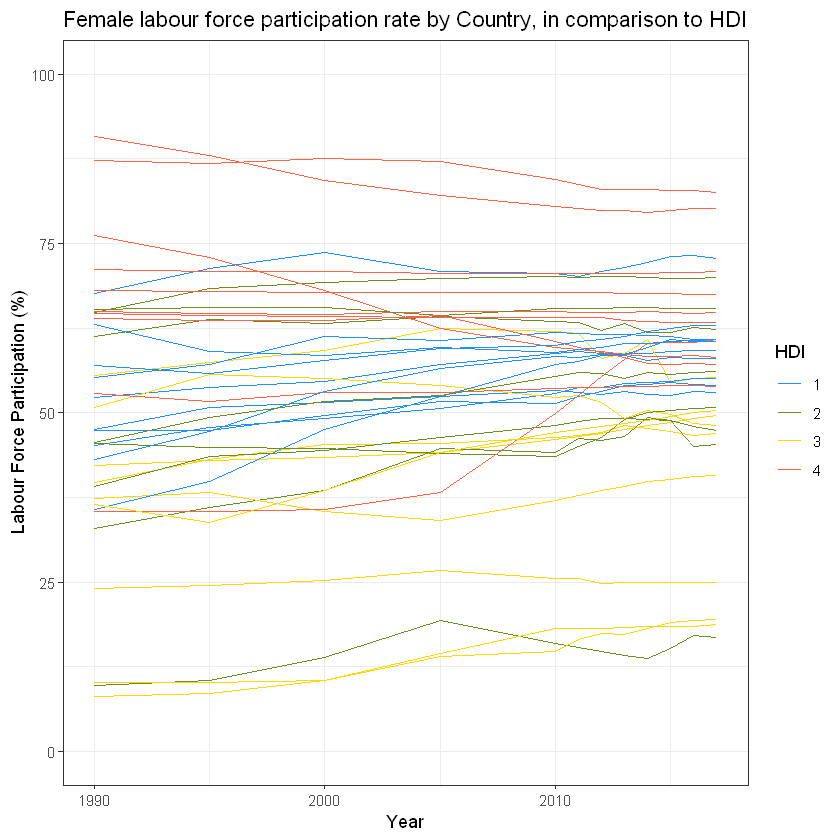

In [56]:
# Plot the male labour force participation rates in comparison to HDI
ggplot() +
    geom_line(data = female_employment2, aes(x=Year, y=Factor, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colours
    ggtitle('Female labour force participation rate by Country, in comparison to HDI') + 
    xlab('Year') + ylab('Labour Force Participation (%)') + ylim(0,100) # Labels

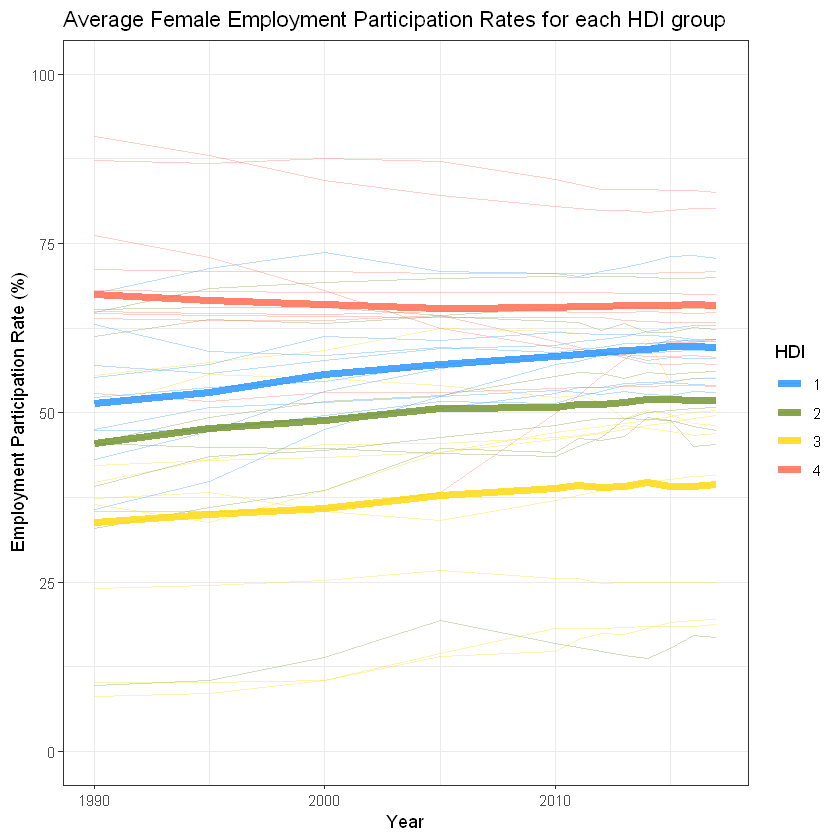

In [59]:
# Group the long dataframe by HDI and Year so we can find the average participation rate for each group
femalegrouped <- female_employment2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Factor = mean(Factor)) # Find the average participation rate

ggplot(female_employment2, aes(x = Year, y = Factor, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot the lines for each country
    geom_line(data = femalegrouped, alpha = .8, size = 2) + # Plot bold line for averages
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually pick colors
    theme_bw() + ggtitle('Average Female Employment Participation Rates for each HDI group') + 
    xlab('Year') + ylab('Employment Participation Rate (%)') + ylim(0,100) # Labels

HDI,Country,Year,Factor,Gender
1,Norway,1990,70.3,M
1,Switzerland,1990,80.5,M
1,Australia,1990,75.8,M
1,Ireland,1990,70.6,M
1,Germany,1990,72.6,M
1,Iceland,1990,80.8,M
1,"Hong Kong, China (SAR)",1990,79.3,M
1,Sweden,1990,72.1,M
1,Singapore,1990,78.7,M
1,Netherlands,1990,70.5,M
